# Perceptron for classification

## Import the necessary modules and packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## The Perceptron

In [2]:
class Perceptron():
    """
    Perceptron classifier using the unit step as activation function.
    
    Parameters
    ------------
    eta: float
        Learning rate (between 0.0 and 1.0).
    n_iter: int
        Passes over the training dataset.
    random_state: int
        Random number generator seed for random weight initialization.
        
    Atributes
    ------------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of misclassifications (updates) in each epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Fit training data.
        
        Parameters
        ------------
        X: {array-like}, shape = [n_examples, n_features]
            Training vectors where n_examples is the number of examples and 
            n_features is the number of features.
        y: array-like, shape = [n_examples]
            Target values.
            
        Returns
        ------------
        self: object
        
        """
        np.random.seed(self.random_state)
        self.w_ = np.random.normal(loc=0.0, scale=0.01,
                                   size=X.shape[1])
        self.b_ = np.random.normal(loc=0.0, scale=0.01,
                                   size=1)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def _feedforward(self, X):
        """
        Pass the input array through the perceptron.
        
        """
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """
        Returns the prediction, i.e. the class label after the unit step function.
        
        """
        return np.where(self._feedforward(X) >= 0.0, 1, -1)
    
    def score(self, X, y):
        """
        Returns the accuracy of the perceptron.
        """
        return (self.predict(X) == y).mean()

## Test the classifier

### Import the data

In [3]:
url = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
url

'https://archive.ics.uci.edu\\ml\\machine-learning-databases\\iris\\iris.data'

In [4]:
df = pd.read_csv(url, header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Select the inputs and labels

In [5]:
# Select setosa and versicolor
idx = df.loc[df[df.columns[-1]].isin(['Iris-setosa', 'Iris-versicolor'])].index

# Extract sepal length and petal length
X = df.loc[idx, [0, 2]].values
y = df.loc[idx, df.columns[-1]].values

# Convert the labels to numbers
y = np.where(y == 'Iris-setosa', 1, -1)

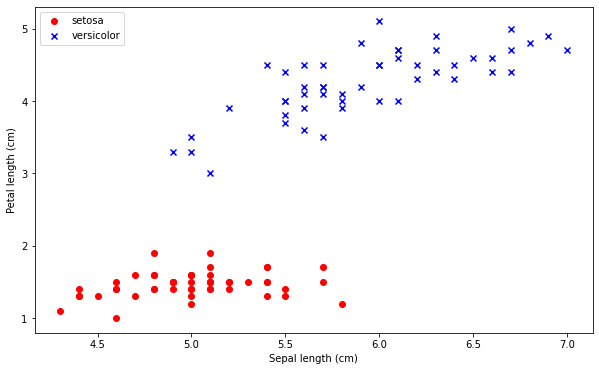

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X[y==1, 0], X[y==1, 1], color='red', marker='o', label='setosa')
ax.scatter(X[y==-1, 0], X[y==-1, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

## Train the perceptron

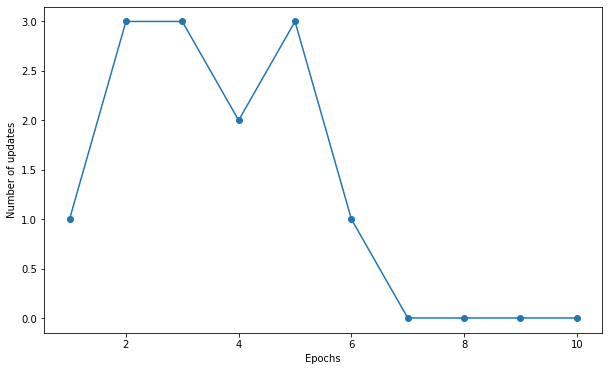

In [7]:
clf = Perceptron(eta=0.01, n_iter=10)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(clf.errors_) + 1),
        clf.errors_,
        marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Evaluate the model's decision boundaries

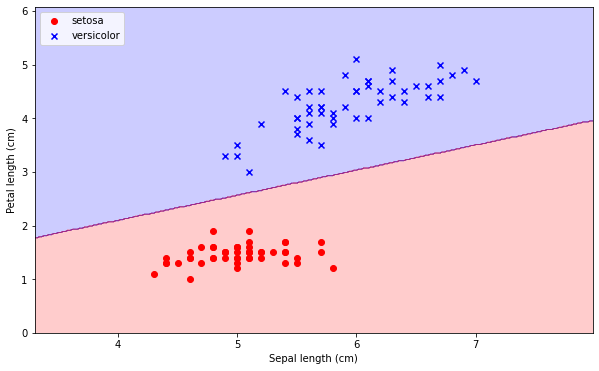

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# Determine the plot's boundaries
# where x1 represents the x axis i.e. sepal length
# and x2 the y axis, i.e. petal length, of the final plot
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a retangular grid of points inside the boundaries
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

# Predict the respective classes for the grid points
# The perceptron needs an input with shape (n, 2) so there's a need to flatten the grid points
Z = clf.predict(np.concatenate((xx1.ravel().reshape(-1, 1),
                                xx2.ravel().reshape(-1, 1)),
                               axis=1))
Z = Z.reshape(xx1.shape)

# Plot the gridpoints
ax.contourf(xx1, xx2, Z, alpha=0.2, colors=['blue', 'red'])

# Set the plot's limits to the xx1 and xx2
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())

# Plot the datapoints
ax.scatter(X[y==1, 0], X[y==1, 1], color='red', marker='o', label='setosa')
ax.scatter(X[y==-1, 0], X[y==-1, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')

plt.show()